<h2>This workshop is based on this cheatsheet</h2>
<a>https://scikit-learn.org/stable/machine_learning_map.html</a>

In [1]:
print('hello')

hello


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [4]:
!chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


In [5]:
#!/bin/bash
!kaggle datasets download brsahan/vehicle-co2-emissions-dataset

Dataset URL: https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset
License(s): apache-2.0
  0% 0.00/87.7k [00:00<?, ?B/s]
100% 87.7k/87.7k [00:00<00:00, 69.3MB/s]


In [6]:
#!/bin/bash
!kaggle datasets download mfarhaannazirkhan/heart-dataset

Dataset URL: https://www.kaggle.com/datasets/mfarhaannazirkhan/heart-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/27.5k [00:00<?, ?B/s]
100% 27.5k/27.5k [00:00<00:00, 46.6MB/s]


In [7]:
#!/bin/bash
!kaggle datasets download willianoliveiragibin/top-12-german-companies

Dataset URL: https://www.kaggle.com/datasets/willianoliveiragibin/top-12-german-companies
License(s): CC0-1.0
  0% 0.00/22.9k [00:00<?, ?B/s]
100% 22.9k/22.9k [00:00<00:00, 34.4MB/s]


In [8]:
!pip install patool pyunpack

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 2.8 MB/s eta 0:00:00


In [9]:
from pyunpack import Archive
zip_file_path = '/content/top-12-german-companies.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")

Ekstraksi selesai.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Supervised 1: Classification</h1>
<h2>Study case: Heart disease prediction</h2>

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Test_dataset/raw_merged_heart_dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2181 non-null   object 
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 238.7+ KB


In [13]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

1287


In [14]:
print(df.duplicated().sum())

0


In [15]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<Axes: ylabel='target'>

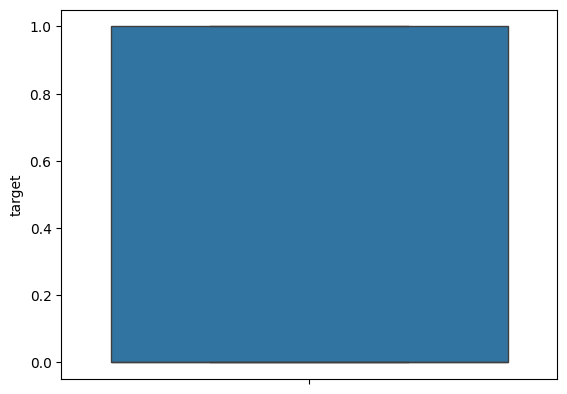

In [16]:
sns.boxplot(df['target'])

In [17]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].value_counts())
    print('\n')

age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77 28 30 31 32 33 36]
age
54    59
58    45
52    42
57    34
59    34
51    33
48    33
55    33
56    32
41    30
50    29
60    29
43    28
53    28
44    28
46    27
62    25
49    24
45    24
42    23
64    21
47    19
65    19
39    18
63    18
61    17
67    17
40    14
66    14
35    13
37    12
38    10
70     9
34     8
68     7
69     6
71     6
36     5
29     4
32     4
77     3
76     2
31     2
33     2
74     2
28     1
30     1
Name: count, dtype: int64


sex
[1 0]
sex
1    624
0    270
Name: count, dtype: int64


cp
[3 2 1 0 4]
cp
4    252
2    236
3    161
0    156
1     89
Name: count, dtype: int64


trestbps
['145' '130' '120' '140' '172' '150' '110' '135' '160' '105' '125' '142'
 '155' '104' '138' '128' '108' '134' '122' '115' '118' '100' '124' '94'
 '112' '102' '152' '101' '132' '148' '178' '129' '180' '136' '126' '106'
 '156' '170' '146' 

<h3>Clean trestbps</h3>

In [18]:
def clean_trestbps(val):
  if(val=='?'):
    return np.nan
  else:
    return int(val)

df['trestbps'] = df['trestbps'].apply(clean_trestbps)
df['trestbps'].head()

,trestbps
0,145.0
1,130.0
2,130.0
3,120.0
4,120.0


In [19]:
df['trestbps'].unique()

array([145., 130., 120., 140., 172., 150., 110., 135., 160., 105., 125.,
       142., 155., 104., 138., 128., 108., 134., 122., 115., 118., 100.,
       124.,  94., 112., 102., 152., 101., 132., 148., 178., 129., 180.,
       136., 126., 106., 156., 170., 146., 117., 200., 165., 174., 192.,
       144., 123., 154., 114., 164.,  98., 190.,  nan, 113.,  92., 158.])

In [20]:
print(df['trestbps'].isnull().sum())
df.dropna(subset=['trestbps'], inplace=True)

1


In [21]:
df['trestbps'].isnull().sum()

0

<h2>Clean chol</h2>

In [22]:
def clean_chol(val):
  if(val=='?'):
    return np.nan
  else:
    return int(val)

df['chol'] = df['chol'].apply(clean_chol)
df['chol'].head()

,chol
0,233.0
1,250.0
2,204.0
3,236.0
4,354.0


In [23]:
df['chol'].unique()

array([233., 250., 204., 236., 354., 192., 294., 263., 199., 168., 239.,
       275., 266., 211., 283., 219., 340., 226., 247., 234., 243., 302.,
       212., 175., 417., 197., 198., 177., 273., 213., 304., 232., 269.,
       360., 308., 245., 208., 264., 321., 325., 235., 257., 216., 256.,
       231., 141., 252., 201., 222., 260., 182., 303., 265., 309., 186.,
       203., 183., 220., 209., 258., 227., 261., 221., 205., 240., 318.,
       298., 564., 277., 214., 248., 255., 207., 223., 288., 160., 394.,
       315., 246., 244., 270., 195., 196., 254., 126., 313., 262., 215.,
       193., 271., 268., 267., 210., 295., 306., 178., 242., 180., 228.,
       149., 278., 253., 342., 157., 286., 229., 284., 224., 206., 167.,
       230., 335., 276., 353., 225., 330., 290., 172., 305., 188., 282.,
       185., 326., 274., 164., 307., 249., 341., 407., 217., 174., 281.,
       289., 322., 299., 300., 293., 184., 409., 259., 200., 327., 237.,
       218., 319., 166., 311., 169., 187., 176., 24

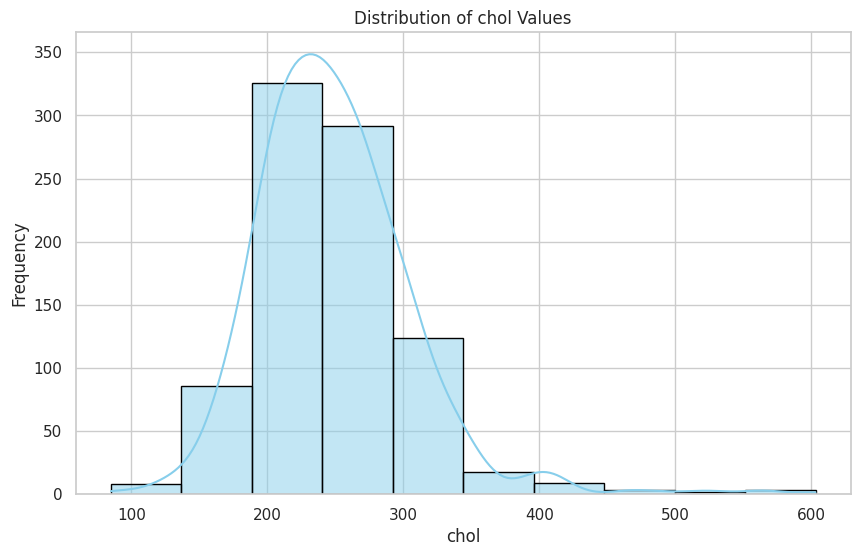

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True, bins=10, color='skyblue', edgecolor='black')

plt.title('Distribution of chol Values')
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.show()

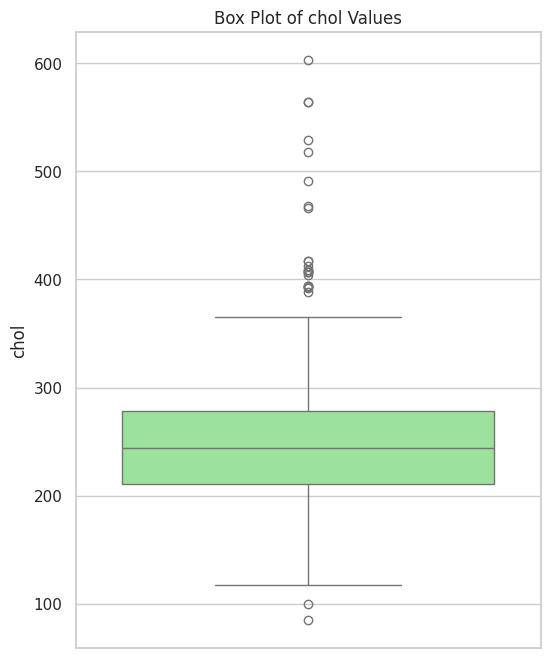

In [25]:
# Plotting the box plot
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['chol'], color='lightgreen')

plt.title('Box Plot of chol Values')
plt.ylabel('chol')
plt.show()

In [26]:
df['chol'].fillna(df['chol'].median(),inplace=True)

<ipython-input-26-a7d83bfd86ca>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['chol'].fillna(df['chol'].median(),inplace=True)


In [27]:
df['chol'].isnull().sum()

0

In [28]:
print(df['chol'].unique())

[233. 250. 204. 236. 354. 192. 294. 263. 199. 168. 239. 275. 266. 211.
 283. 219. 340. 226. 247. 234. 243. 302. 212. 175. 417. 197. 198. 177.
 273. 213. 304. 232. 269. 360. 308. 245. 208. 264. 321. 325. 235. 257.
 216. 256. 231. 141. 252. 201. 222. 260. 182. 303. 265. 309. 186. 203.
 183. 220. 209. 258. 227. 261. 221. 205. 240. 318. 298. 564. 277. 214.
 248. 255. 207. 223. 288. 160. 394. 315. 246. 244. 270. 195. 196. 254.
 126. 313. 262. 215. 193. 271. 268. 267. 210. 295. 306. 178. 242. 180.
 228. 149. 278. 253. 342. 157. 286. 229. 284. 224. 206. 167. 230. 335.
 276. 353. 225. 330. 290. 172. 305. 188. 282. 185. 326. 274. 164. 307.
 249. 341. 407. 217. 174. 281. 289. 322. 299. 300. 293. 184. 409. 259.
 200. 327. 237. 218. 319. 166. 311. 169. 187. 176. 241. 131. 132. 161.
 173. 194. 297. 292. 339. 147. 291. 358. 412. 238. 163. 280. 202. 328.
 129. 190. 179. 272. 100. 468. 320. 312. 171. 365. 344.  85. 347. 251.
 287. 156. 117. 466. 338. 529. 392. 329. 355. 603. 404. 518. 285. 279.
 388. 

<h2>Clean FBS</h2>

In [29]:
def clean_fbs(val):
  if(val=='?'):
    return np.nan
  else:
    return int(val)

df['fbs'] = df['fbs'].apply(clean_fbs)
df['fbs'].head()

,fbs
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [30]:
print(df['fbs'].isnull().sum())
df.dropna(subset=['fbs'], inplace=True)

8


In [31]:
print(df['fbs'].isnull().sum())

0


<h2>Clean restECG</h2>

In [32]:
def clean_restecg(val):
  if(val=='?'):
    return np.nan
  else:
    return int(val)

df['restecg'] = df['restecg'].apply(clean_restecg)
df['restecg'].head()

,restecg
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [33]:
print(df['restecg'].isnull().sum())
df.dropna(subset=['restecg'], inplace=True)

1


In [34]:
print(df['restecg'].isnull().sum())

0


<h2>clean exang</h2>

In [35]:
def clean_exang(val):
  if(val=='?'):
    return np.nan
  else:
    return int(val)

df['exang'] = df['exang'].apply(clean_exang)
df['exang'].head()

,exang
0,0
1,0
2,0
3,0
4,1


In [36]:
df['exang'].unique()

array([0, 1])

In [37]:
print(df['exang'].isnull().sum())
df.dropna(subset=['exang'], inplace=True)

0


<h2>Clean slope</h2>

In [38]:
def clean_slope(val):
  if(val=='?'):
    return np.nan
  else:
    return int(val)

df['slope'] = df['slope'].apply(clean_slope)
df['slope'].head()

,slope
0,0.0
1,0.0
2,2.0
3,2.0
4,2.0


In [39]:
df['slope'].unique()

array([ 0.,  2.,  1., nan,  3.])

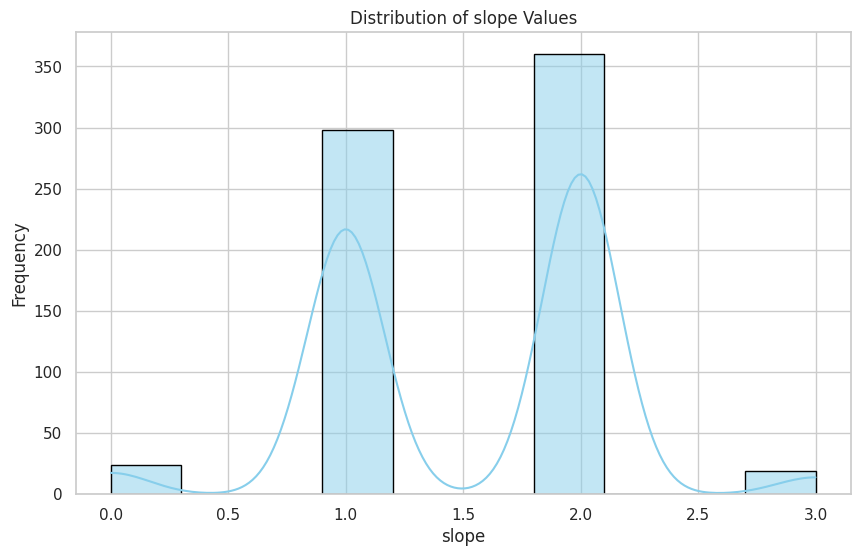

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['slope'], kde=True, bins=10, color='skyblue', edgecolor='black')

plt.title('Distribution of slope Values')
plt.xlabel('slope')
plt.ylabel('Frequency')
plt.show()

In [41]:
df['slope'].mode()

,slope
0,2.0


In [42]:
df['slope'].fillna(df['slope'].mode()[0],inplace=True)

<ipython-input-42-5ec1d54dd87a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['slope'].fillna(df['slope'].mode()[0],inplace=True)


In [43]:
df['slope'].isnull().sum()

0

In [44]:
df['slope'].unique()

array([0., 2., 1., 3.])

<h2>class ca</h2>

In [45]:
def clean_ca(val):
  if(val=='?'):
    return np.nan
  else:
    return int(val)

df['ca'] = df['ca'].apply(clean_ca)
df['ca'].head()

,ca
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [46]:
df['ca'].unique()

array([ 0.,  2.,  1.,  3.,  4., nan])

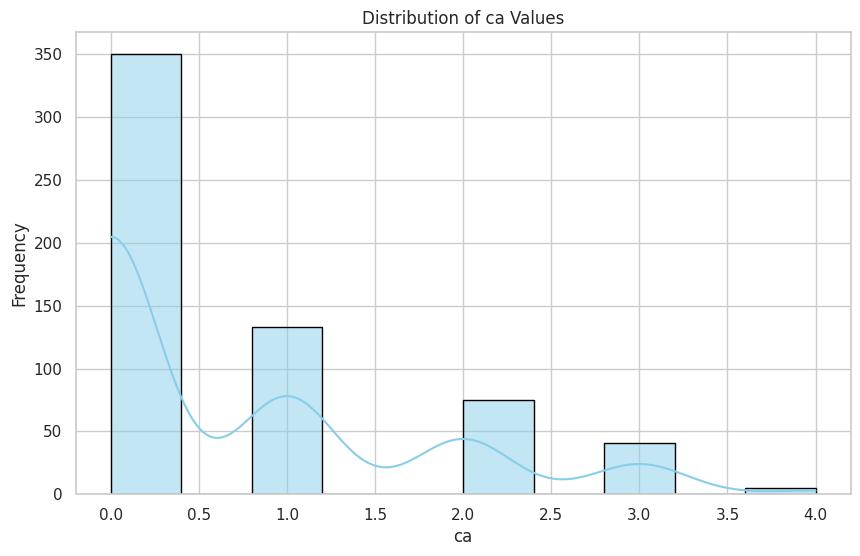

In [47]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['ca'], kde=True, bins=10, color='skyblue', edgecolor='black')

plt.title('Distribution of ca Values')
plt.xlabel('ca')
plt.ylabel('Frequency')
plt.show()

In [48]:
df['ca'].fillna(df['ca'].mode()[0],inplace=True)

<ipython-input-48-c643d8974196>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].mode()[0],inplace=True)


In [49]:
df['ca'].unique()

array([0., 2., 1., 3., 4.])

<h2>Clean thal</h2>

In [50]:
def clean_thal(val):
  if(val=='?'):
    return np.nan
  else:
    return int(val)

df['thal'] = df['thal'].apply(clean_thal)
df['thal'].head()

,thal
0,1.0
1,2.0
2,2.0
3,2.0
4,2.0


In [51]:
df['thal'].unique()

array([ 1.,  2.,  3.,  0., nan,  6.,  7.])

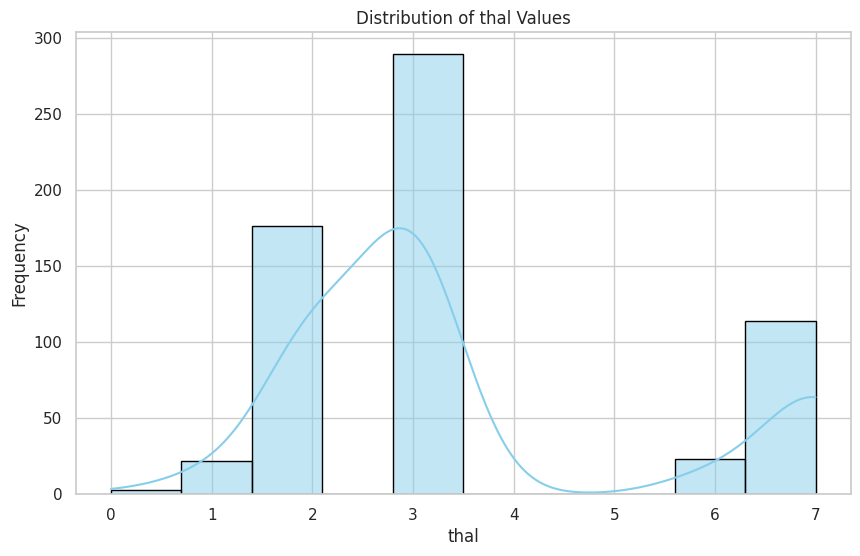

In [52]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['thal'], kde=True, bins=10, color='skyblue', edgecolor='black')

plt.title('Distribution of thal Values')
plt.xlabel('thal')
plt.ylabel('Frequency')
plt.show()

In [53]:
df['thal'].isnull().sum()

257

In [54]:
df['thal'].fillna(df['thal'].mode()[0],inplace=True)

<ipython-input-54-212abb1eed86>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thal'].fillna(df['thal'].mode()[0],inplace=True)


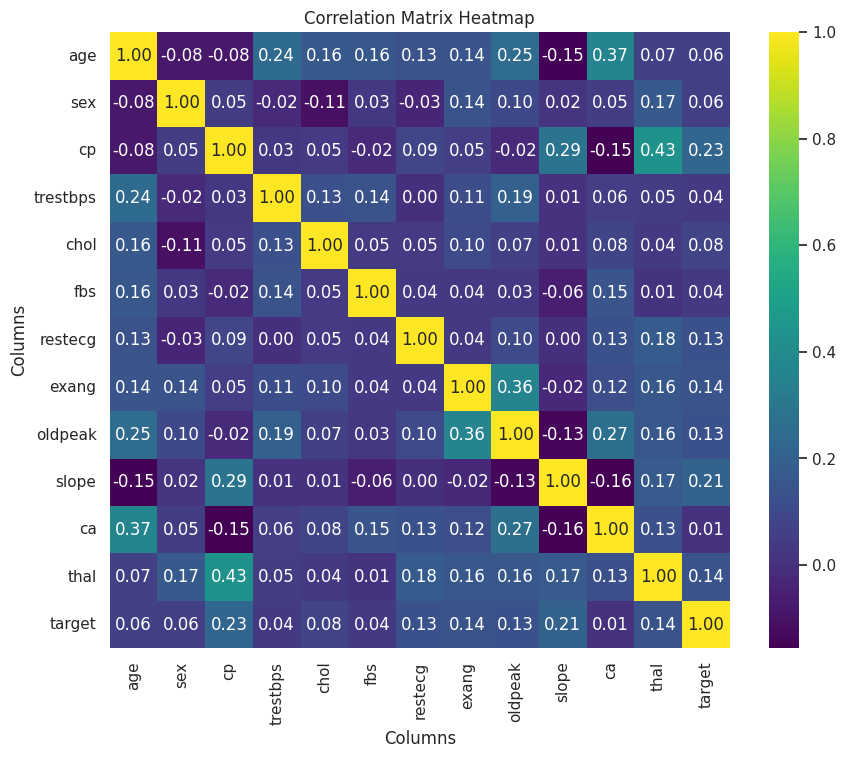

In [55]:
numerical_df = df.select_dtypes(include=[np.number])

# Langkah 3: Menghitung korelasi antar kolom numerik
correlation_matrix = numerical_df.corr()

# Langkah 4: Membuat heatmap untuk matrix korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis', annot=True, fmt='.2f')

# Menambahkan judul dan label
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Menampilkan plot
plt.show()

In [56]:
feature = df.drop(['target'], axis =1)
target = df['target']

In [57]:
feature.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal
0,63,1,3,145.0,233.0,1.0,0.0,150,0,2.3,0.0,0.0,1.0
1,37,1,2,130.0,250.0,0.0,1.0,187,0,3.5,0.0,0.0,2.0
2,41,0,1,130.0,204.0,0.0,0.0,172,0,1.4,2.0,0.0,2.0
3,56,1,1,120.0,236.0,0.0,1.0,178,0,0.8,2.0,0.0,2.0
4,57,0,0,120.0,354.0,0.0,1.0,163,1,0.6,2.0,0.0,2.0


In [58]:
target.head()

,target
0,1
1,1
2,1
3,1
4,1


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>SVC linear</h2>

In [61]:
from sklearn.svm import LinearSVC
clf_svc_lin =  LinearSVC(random_state=0, tol=1e-03)
clf_svc_lin.fit(X_train_scaled, y_train)

LinearSVC(random_state=0, tol=0.001)

In [62]:
y_pred_svc_lin = clf_svc_lin.predict(X_test_scaled)

In [63]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_svc_lin)
accuracy

0.6666666666666666

<h2>K-Neigbor Classifier</h2>

In [64]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')
neigh.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [65]:
y_pred_neigh = neigh.predict(X_test_scaled)

In [66]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_neigh)
accuracy

0.7457627118644068

<h2>SVC kernel rbf</h2>

In [67]:
from sklearn import svm
clf_svc = svm.SVC()
clf_svc.fit(X_train_scaled, y_train)

SVC()

In [68]:
y_pred_svc = clf_svc.predict(X_test_scaled)

In [69]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_svc)
accuracy

0.8305084745762712

<h2>Ensamble Classifier</h2>

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier().fit(X_train_scaled, y_train)

In [71]:
y_pred_forest= clf_forest.predict(X_test_scaled)

In [72]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_forest)
accuracy

0.8757062146892656

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create the RandomForestClassifier
clf_forest = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf_forest,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred_forest = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_forest)

# Output results
print(f"Best Parameters: {random_search.best_params_}")
print(f"Test Accuracy: {accuracy}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Test Accuracy: 0.8700564971751412


<h1>Supervised 2: Regression</h1>
<h2>Study case: Predicting CO2 emission</h2>

In [74]:
df = pd.read_csv('/content/drive/MyDrive/Test_dataset/co2.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [76]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)

1103


In [77]:
print(df.duplicated().sum())

0


In [78]:
print(df.isna().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


<Axes: ylabel='CO2 Emissions(g/km)'>

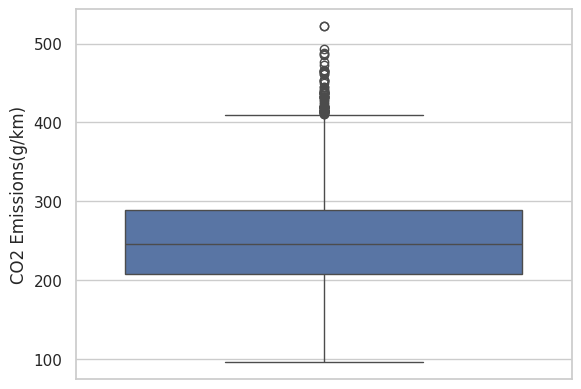

In [79]:
sns.boxplot(df['CO2 Emissions(g/km)'])

In [80]:
# Menghitung persentil ke-25 dan ke-75
percentile25 = df['CO2 Emissions(g/km)'].quantile(0.25)
print("25th Percentile:", percentile25)

percentile75 = df['CO2 Emissions(g/km)'].quantile(0.75)
print("75th Percentile:", percentile75)

# Menghitung rentang interkuartil (IQR)
iqr = percentile75 - percentile25

# Menghitung batas atas dan batas bawah untuk pencilan
uplimit = percentile75 + 1.5 * iqr
lolimit = percentile25 - 1.5 * iqr
print("Upper Limit:", uplimit, "Lower Limit:", lolimit)

# Melakukan capping langsung pada dfFrame asli
df['CO2 Emissions(g/km)'] = np.where(
    df['CO2 Emissions(g/km)'] > uplimit, uplimit,
    np.where(df['CO2 Emissions(g/km)'] < lolimit, lolimit, df['CO2 Emissions(g/km)'])
)

# Menampilkan beberapa baris pertama untuk memeriksa perubahan
print(df.head())

25th Percentile: 208.0
75th Percentile: 289.0
Upper Limit: 410.5 Lower Limit: 86.5
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1        

<Axes: ylabel='CO2 Emissions(g/km)'>

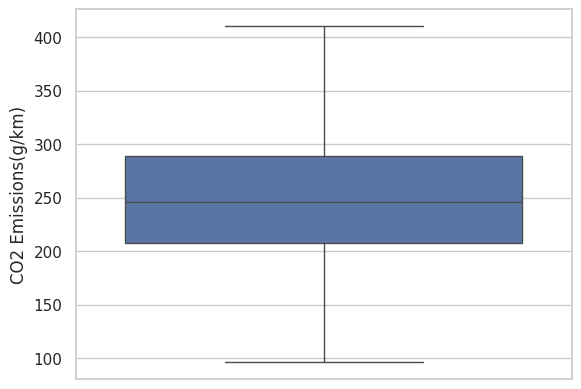

In [81]:
sns.boxplot(df['CO2 Emissions(g/km)'])

In [82]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [83]:
for i in df.columns:
    print(df[i].unique())
    print(df[i].value_counts())
    print('\n')

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
Make
FORD             577
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           276
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            164
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72


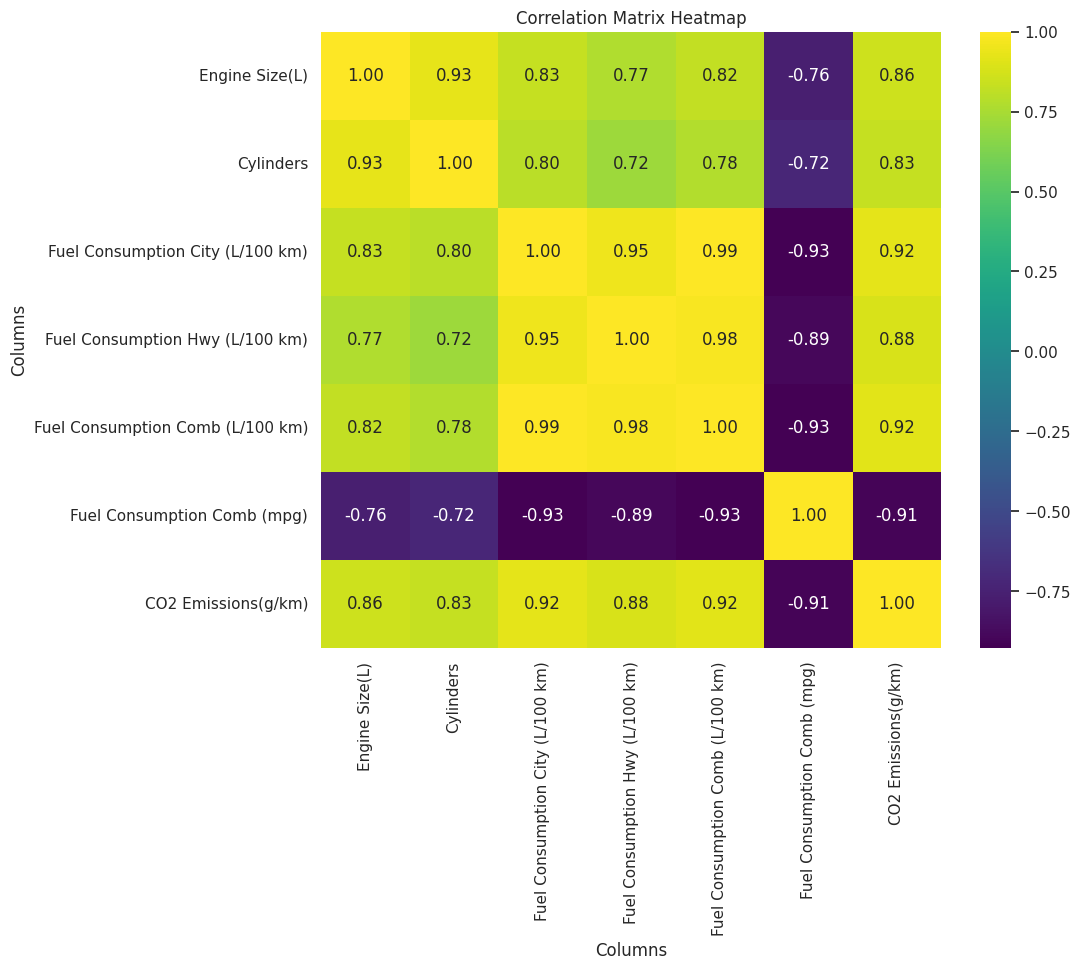

In [84]:
numerical_df = df.select_dtypes(include=[np.number])

# Langkah 3: Menghitung korelasi antar kolom numerik
correlation_matrix = numerical_df.corr()

# Langkah 4: Membuat heatmap untuk matrix korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis', annot=True, fmt='.2f')

# Menambahkan judul dan label
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Menampilkan plot
plt.show()

In [85]:
df = df.drop(columns=['Model'])

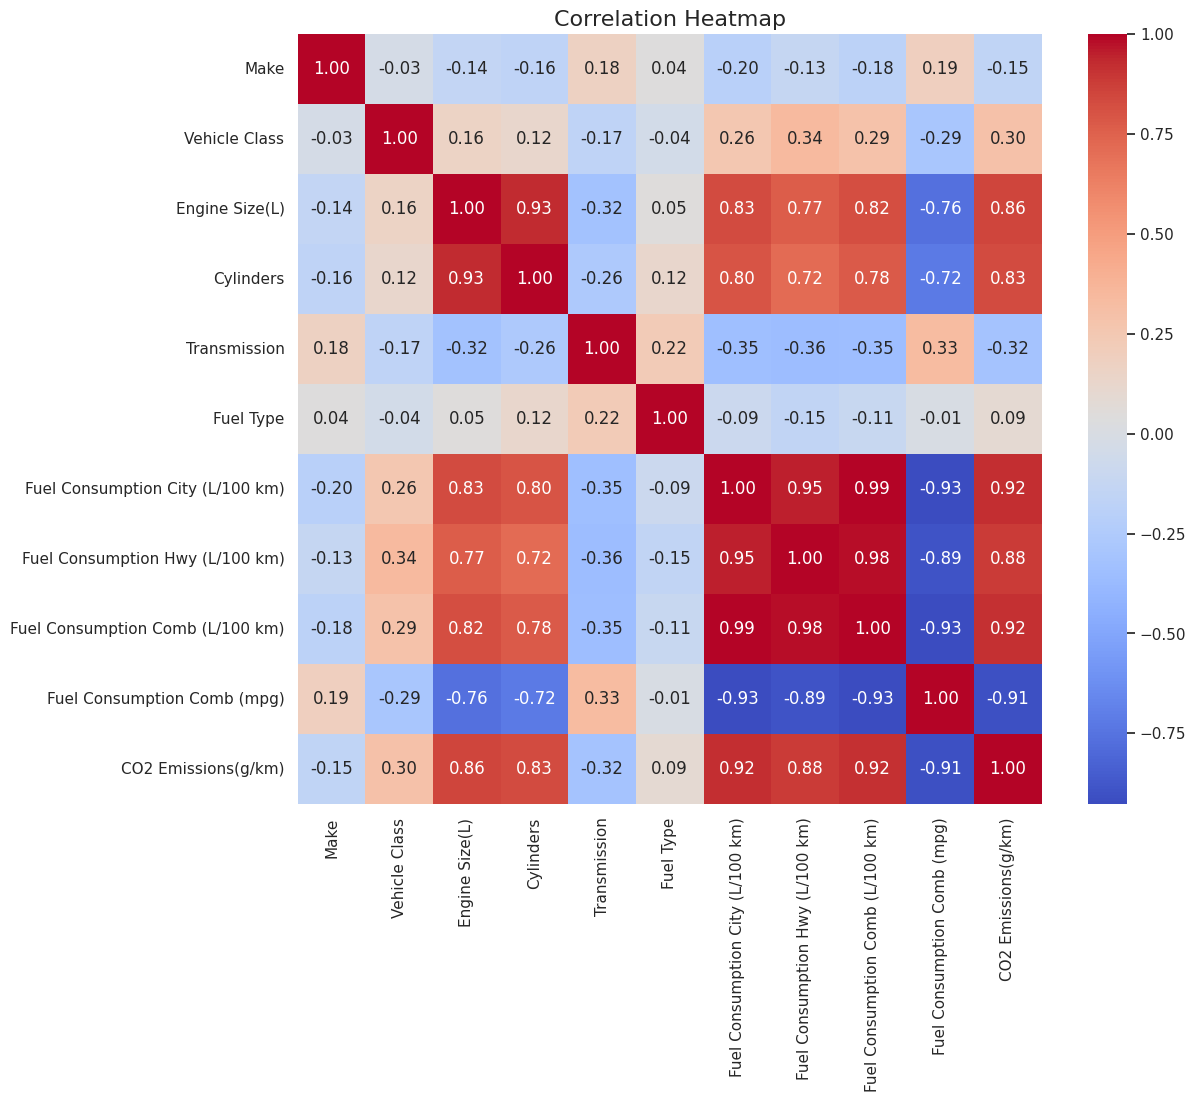

In [86]:
import warnings
from sklearn.preprocessing import LabelEncoder

# Mengabaikan peringatan
warnings.filterwarnings("ignore")

# Membaca data dari CSV
# Mengidentifikasi kolom kategorikal (tipe objek)
categorical_cols = df.select_dtypes(include='object').columns

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Mengaplikasikan LabelEncoder pada semua kolom kategorikal
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Mengatur ukuran plot
plt.figure(figsize=(12, 10))

# Membuat heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Menambahkan judul
plt.title('Correlation Heatmap', fontsize=16)

# Menampilkan plot
plt.show()


In [87]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [88]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = encoder.fit_transform(df[i])

In [89]:
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,0,2.0,4,14,4,9.9,6.7,8.5,33,196.0
1,0,0,2.4,4,25,4,11.2,7.7,9.6,29,221.0
2,0,0,1.5,4,22,4,6.0,5.8,5.9,48,136.0
3,0,11,3.5,6,15,4,12.7,9.1,11.1,25,255.0
4,0,11,3.5,6,15,4,12.1,8.7,10.6,27,244.0


In [90]:
feature = df.drop(['CO2 Emissions(g/km)'], axis =1)
target = df['CO2 Emissions(g/km)']

In [91]:
feature.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,0,0,2.0,4,14,4,9.9,6.7,8.5,33
1,0,0,2.4,4,25,4,11.2,7.7,9.6,29
2,0,0,1.5,4,22,4,6.0,5.8,5.9,48
3,0,11,3.5,6,15,4,12.7,9.1,11.1,25
4,0,11,3.5,6,15,4,12.1,8.7,10.6,27


In [92]:
target.head()

,CO2 Emissions(g/km)
0,196.0
1,221.0
2,136.0
3,255.0
4,244.0


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2>Lasso</h2>

In [95]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [96]:
y_pred_lasso = reg.predict(X_test_scaled)

In [97]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_lasso)

r2 = r2_score(y_test, y_pred_lasso)

In [98]:
print(f"Mean Squared Error: {mse}")

print(f"R2: {r2}")

Mean Squared Error: 299.1252915878119
R2: 0.9129349891547651


<h2>ElasticNet</h2>

In [99]:
from sklearn.linear_model import ElasticNet
reg_elas = ElasticNet(random_state=0)
reg_elas.fit(X_train_scaled, y_train)

ElasticNet(random_state=0)

In [100]:
y_pred_elas = reg_elas.predict(X_test_scaled)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_elas)

r2 = r2_score(y_test, y_pred_elas)

In [102]:
print(f"Mean Squared Error: {mse}")

print(f"R2: {r2}")

Mean Squared Error: 335.7815605017386
R2: 0.9022656190269638


<h2>Ridge Regression</h2>

In [103]:
from sklearn import linear_model
reg_ridge = linear_model.Ridge(alpha=.5)
reg_ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.5)

In [104]:
y_pred_ridge = reg_ridge.predict(X_test_scaled)

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_ridge)

r2 = r2_score(y_test, y_pred_ridge)

In [106]:
print(f"Mean Squared Error: {mse}")

print(f"R2: {r2}")

Mean Squared Error: 299.8196956127051
R2: 0.9127328721968931


<h2>SVR kernel linear</h2>

In [107]:
from sklearn import svm
reg_svm = svm.SVR(kernel ='linear')
reg_svm.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [108]:
y_pred_svm = reg_svm.predict(X_test_scaled)

In [109]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_svm)

r2 = r2_score(y_test, y_pred_svm)

In [110]:
print(f"Mean Squared Error: {mse}")

print(f"R2: {r2}")

Mean Squared Error: 626.6937004075663
R2: 0.8175911721372866


<h2>SVR kernel RBF</h2>

In [111]:
from sklearn import svm
reg_svm_rbf = svm.SVR(kernel ='rbf')
reg_svm_rbf.fit(X_train_scaled, y_train)

SVR()

In [112]:
y_pred_svm_rbf = reg_svm_rbf.predict(X_test_scaled)

In [113]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_svm_rbf)

r2 = r2_score(y_test, y_pred_svm_rbf)

In [114]:
print(f"Mean Squared Error: {mse}")

print(f"R2: {r2}")

Mean Squared Error: 259.8852996790389
R2: 0.9243563915476194


<h2>ensamble regressor</h2>

In [115]:
from sklearn.ensemble import HistGradientBoostingRegressor
est = HistGradientBoostingRegressor().fit(X_train_scaled, y_train)

In [116]:
y_pred_ens= est.predict(X_test_scaled)

In [117]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_ens)

r2 = r2_score(y_test, y_pred_ens)

In [118]:
print(f"Mean Squared Error: {mse}")

print(f"R2: {r2}")

Mean Squared Error: 10.321163875852422
R2: 0.996995866715193


<h2>Karena ensammble regressor berperforma paling baik maka kita tuning menjadi lebih baik lagi</h2>

In [119]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'learning_rate': np.logspace(-3, 0, 10),  # Range from 0.001 to 1
    'max_iter': [50, 100, 200, 300],
    'max_leaf_nodes': [10, 20, 31, 50],
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10, 20, 30],
    'l2_regularization': np.logspace(-4, 1, 6),  # Range from 0.0001 to 10
}

# Instantiate the model
estimator = HistGradientBoostingRegressor()

# RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train_scaled, y_train)

# Best parameters and estimator
print("Best parameters found: ", random_search.best_params_)
best_model = random_search.best_estimator_

# Predict and evaluate the model
y_pred_ens = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_ens)
r2 = r2_score(y_test, y_pred_ens)

print(f"Mean Squared Error: {mse}")
print(f"R2: {r2}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'min_samples_leaf': 5, 'max_leaf_nodes': 31, 'max_iter': 100, 'max_depth': 10, 'learning_rate': 0.21544346900318823, 'l2_regularization': 10.0}
Mean Squared Error: 8.347224562683211
R2: 0.9975704120730818


<h1>Unsupervised 1: Clustering</h1>

In [120]:
df = pd.read_csv('/content/drive/MyDrive/Test_dataset/Mall_Customers.csv')

In [121]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [123]:
df.shape

(200, 5)

In [124]:
x = df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [125]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,31):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',n_init="auto",random_state=0).fit(x)

  wcss.append(kmeans.inertia_)

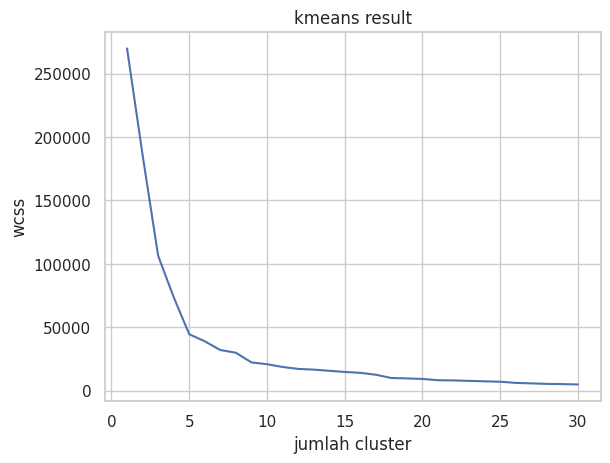

In [126]:
plt.plot(range(1,31),wcss)
plt.title('kmeans result')
plt.xlabel('jumlah cluster')
plt.ylabel('wcss')
sns.set()
plt.show()

In [127]:
kmeans = KMeans(n_clusters=5, init ='k-means++', n_init='auto', random_state=0)
y = kmeans.fit_predict(x)
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

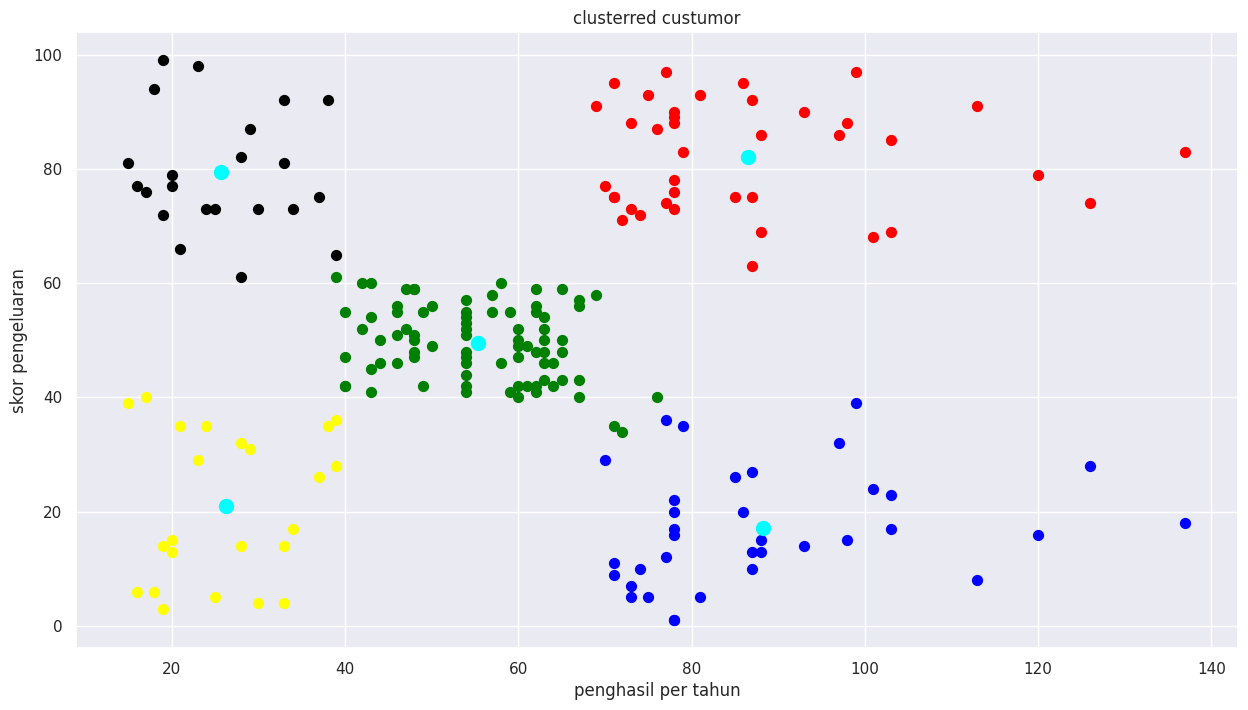

In [128]:
plt.figure(figsize=(15,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50,c='green', label='cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50,c='red', label='cluster 1')
plt.scatter(x[y==2,0], x[y==2,1], s=50,c='blue', label='cluster 1')
plt.scatter(x[y==3,0], x[y==3,1], s=50,c='yellow', label='cluster 1')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='black', label='cluster 1')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='cluster center')

plt.title('clusterred custumor')
plt.xlabel('penghasil per tahun')
plt.ylabel('skor pengeluaran')
plt.show()


Finding optimal number of clusters...


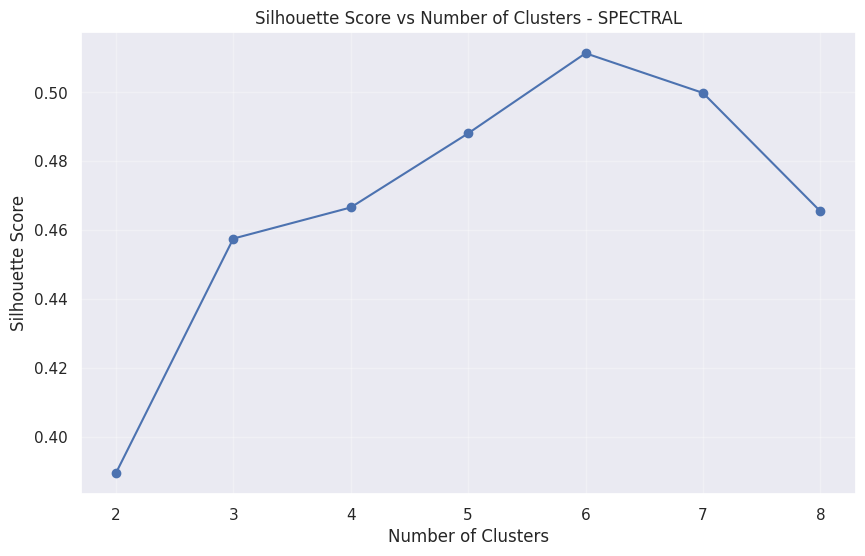

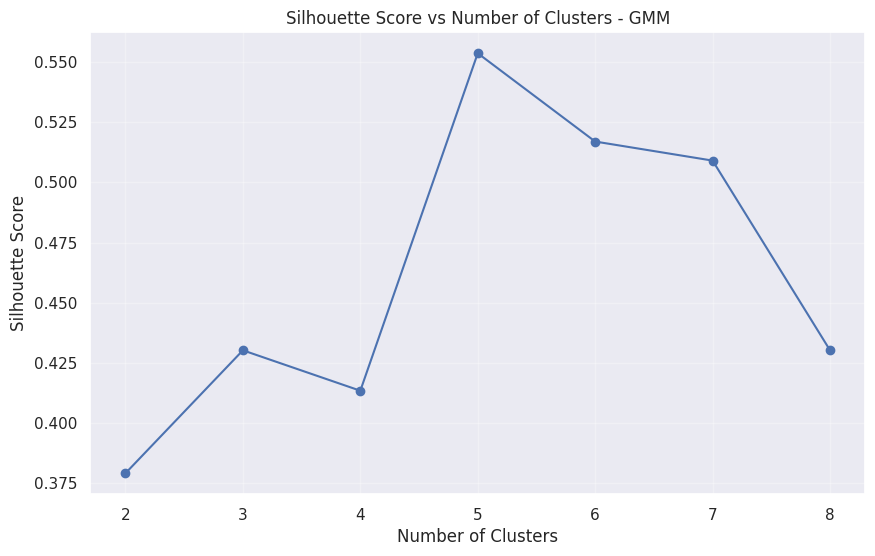


Optimal number of clusters for Spectral Clustering: 6
Optimal number of clusters for GMM: 5


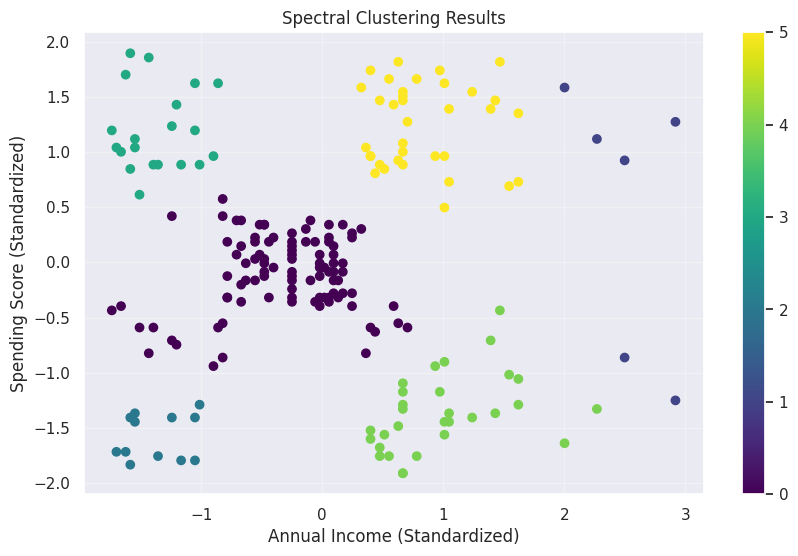

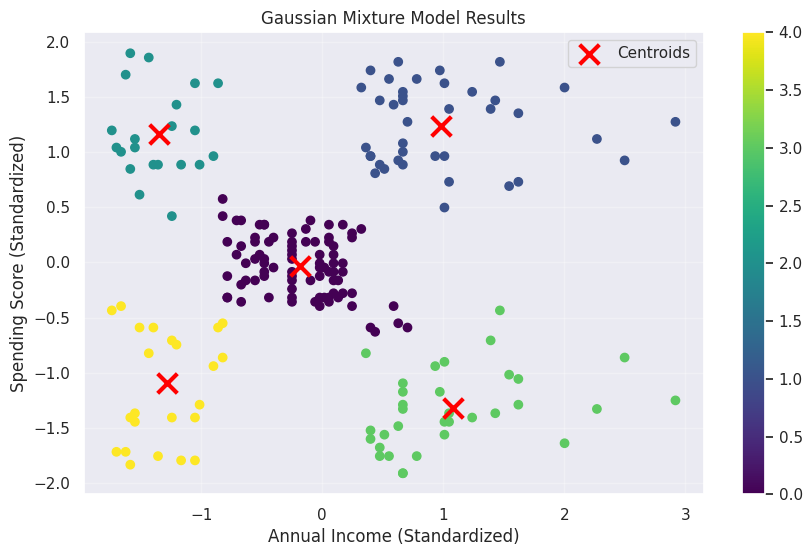


Spectral Clustering Analysis:

Cluster 1:
Number of customers: 97
Average characteristics:
Annual Income: $52.39k
Spending Score: 47.45

Cluster 2:
Number of customers: 6
Average characteristics:
Annual Income: $126.50k
Spending Score: 62.17

Cluster 3:
Number of customers: 12
Average characteristics:
Annual Income: $24.58k
Spending Score: 9.58

Cluster 4:
Number of customers: 20
Average characteristics:
Annual Income: $24.95k
Spending Score: 81.00

Cluster 5:
Number of customers: 30
Average characteristics:
Annual Income: $86.60k
Spending Score: 15.10

Cluster 6:
Number of customers: 35
Average characteristics:
Annual Income: $82.26k
Spending Score: 82.17

GMM Clustering Analysis:

Cluster 1:
Number of customers: 84
Average characteristics:
Annual Income: $55.64k
Spending Score: 49.37

Cluster 2:
Number of customers: 39
Average characteristics:
Annual Income: $86.54k
Spending Score: 82.13

Cluster 3:
Number of customers: 21
Average characteristics:
Annual Income: $25.10k
Spending Sco

In [129]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Read and prepare the data
df = pd.read_csv('/content/drive/MyDrive/Test_dataset/Mall_Customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to plot clusters
def plot_clusters(X, labels, centers=None, title='Clustering Results'):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidth=3, label='Centroids')

    plt.xlabel('Annual Income (Standardized)')
    plt.ylabel('Spending Score (Standardized)')
    plt.title(title)
    plt.colorbar(scatter)
    if centers is not None:
        plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Function to find optimal number of clusters
def find_optimal_clusters(X, max_clusters, method='spectral'):
    silhouette_scores = []

    for n_clusters in range(2, max_clusters + 1):
        if method == 'spectral':
            clusterer = SpectralClustering(n_clusters=n_clusters, random_state=42)
        else:  # GMM
            clusterer = GaussianMixture(n_components=n_clusters, random_state=42)

        labels = clusterer.fit_predict(X)
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score vs Number of Clusters - {method.upper()}')
    plt.grid(True, alpha=0.3)
    plt.show()

    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
    return optimal_clusters

# Find optimal number of clusters for both methods
max_clusters = 8
print("\nFinding optimal number of clusters...")
optimal_spectral = find_optimal_clusters(X_scaled, max_clusters, 'spectral')
optimal_gmm = find_optimal_clusters(X_scaled, max_clusters, 'gmm')

print(f"\nOptimal number of clusters for Spectral Clustering: {optimal_spectral}")
print(f"Optimal number of clusters for GMM: {optimal_gmm}")

# Perform Spectral Clustering
spectral = SpectralClustering(n_clusters=optimal_spectral, random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)
plot_clusters(X_scaled, spectral_labels, title='Spectral Clustering Results')

# Perform GMM
gmm = GaussianMixture(n_components=optimal_gmm, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
plot_clusters(X_scaled, gmm_labels, centers=gmm.means_, title='Gaussian Mixture Model Results')

# Analysis of clusters
def analyze_clusters(X, labels, original_data, method_name):
    n_clusters = len(np.unique(labels))
    print(f"\n{method_name} Clustering Analysis:")

    for i in range(n_clusters):
        cluster_points = X[labels == i]
        original_points = original_data[labels == i]

        print(f"\nCluster {i + 1}:")
        print(f"Number of customers: {len(cluster_points)}")
        print("Average characteristics:")
        print(f"Annual Income: ${original_points[:, 0].mean():.2f}k")
        print(f"Spending Score: {original_points[:, 1].mean():.2f}")

# Perform analysis for both methods
analyze_clusters(X_scaled, spectral_labels, X, "Spectral")
analyze_clusters(X_scaled, gmm_labels, X, "GMM")

# Calculate and print model performance metrics
spectral_silhouette = silhouette_score(X_scaled, spectral_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print("\nModel Performance Metrics:")
print(f"Spectral Clustering Silhouette Score: {spectral_silhouette:.3f}")
print(f"GMM Silhouette Score: {gmm_silhouette:.3f}")